# EXERCICIO 8

In [25]:
# Import all necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
import seaborn as sns

In [26]:
# Use the 20 Newsgroups corpus from scikit.
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [27]:
# Select just a few of these categories, and download the training and testing set.
categories = ['comp.windows.x', 'comp.os.ms-windows.misc', 'misc.forsale','rec.autos']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [28]:
# Convert a collection of text documents to a matrix of token counts.
cv = CountVectorizer()
# Naive Bayes classifier for multinomial models.
mnb = MultinomialNB()
# Create a pipeline that attaches the vectorizer to a multinomial naive Bayes classifier.
model = make_pipeline(cv, mnb)

In [29]:
# Train model. Apply the model to the training data.
model.fit(train.data, train.target)
# Run validation. Predict labels for the test data.
labels = model.predict(test.data)

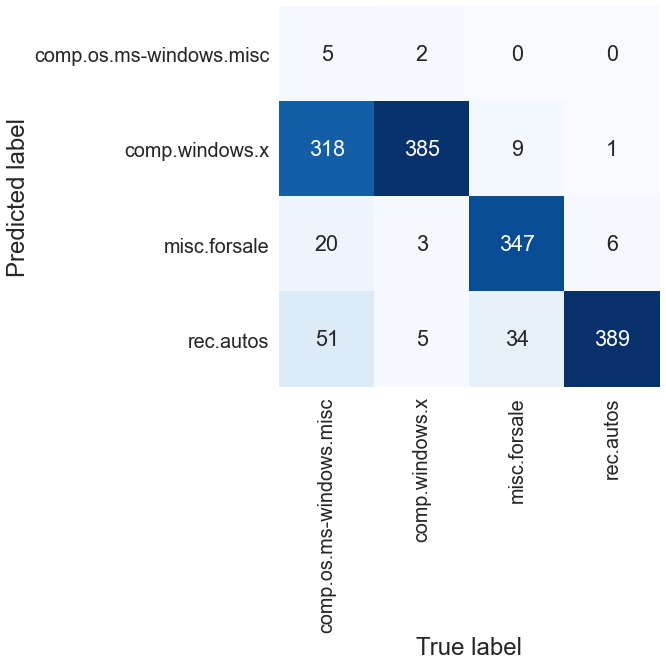

In [30]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(test.target, labels)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
# Save figure
plt.savefig("confusion_matrix_text_classification.png", dpi=600)
plt.show()

In [31]:
class_cnt = np.zeros((4))
for i in range(0,len(train.target)):
    class_cnt[train.target[i]]=class_cnt[train.target[i]]+1

for i in range(0,4):
    print('%s: %d' % (train.target_names[i], class_cnt[i]))

comp.os.ms-windows.misc: 591
comp.windows.x: 593
misc.forsale: 585
rec.autos: 594


**a. O que você percebe em relação à classe ‘comp.os.ms-windows.misc’?**

R: Para a classe ‘comp.os.ms-windows.misc’ o número de falso positivo é muito ALTO ela é facilmente confudida com a classe 'comp.windows.x' que possui um número alto de acerto. 


**b. Qual uma possível explicação para o que você percebeu no item anterior?**

R: Uma razão explicação deve ser pela semelhanças entre as suas palavras o que possivelmente pode ter atrapalhado o classificador, fazendo com ele classifica de forma errada algumas mensagens devido a semelhanças entre as palavras. 